# ***RESULTADOS***

## *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
    - 1.1. Acondicionamiento bases de datos
    - 1.2. Análisis visual
    - 1.3. Análisis estadístico  
2. MACHINE LEARNING
    - 2.1. Preparación y limpieza de datos
    - 2.2. Feature Engineering
    - 2.3. Modelado
3. **RESULTADOS**
    - [3.1. Visualización y reporting de los resultados](#31)
    - [3.2. Creación de un pipeline para el flujo automatizado](#32)
---

In [219]:
# Librery
from utils.libreries import *

%matplotlib inline 

##  **3.1. Visualización y reporting de los resultados**<a id='31'></a>

In [220]:
sns.set(rc={'figure.figsize':(15, 8)})

In [229]:
csv_baseline_metrics = pd.read_csv('model/model_metrics/baseline_metrics.csv',sep=';').sort_values(by='Precision',ascending=False)
csv_baseline_fs_metrics = pd.read_csv('model/model_metrics/baseline_fs_metrics.csv',sep=';').sort_values(by='Precision',ascending=False)
csv_metrics = pd.read_csv('model/model_metrics/metrics.csv',sep=';').sort_values(by='Precision',ascending=False)
csv_fs_metrics = pd.read_csv('model/model_metrics/fs_metrics.csv',sep=';').sort_values(by='Precision',ascending=False)
csv_DL_metrics = pd.read_csv('model/model_metrics/DL_metrics_hyp.csv',sep=';').sort_values(by='Precision',ascending=False)

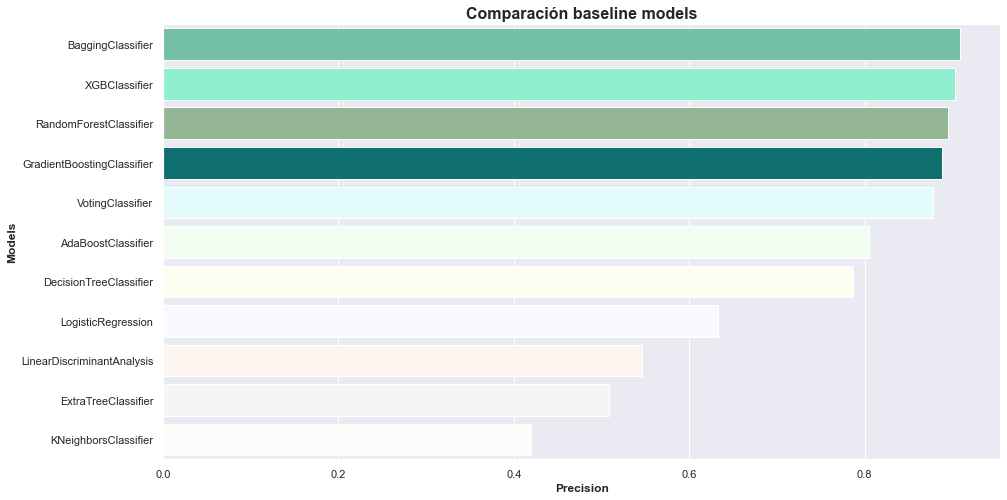

In [227]:
clf_models_comparation(csv_baseline_metrics,title="Comparación baseline models")

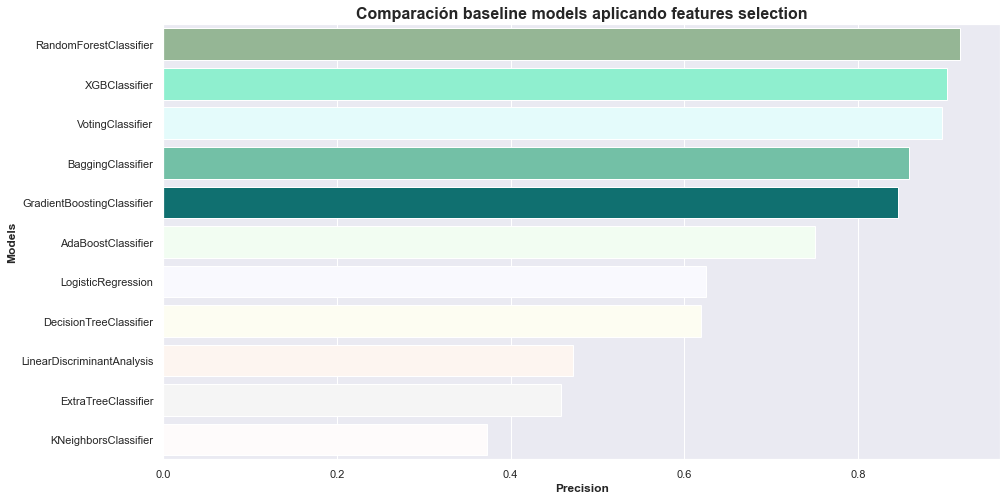

In [304]:
clf_models_comparation(csv_baseline_fs_metrics,title="Comparación baseline models aplicando features selection")

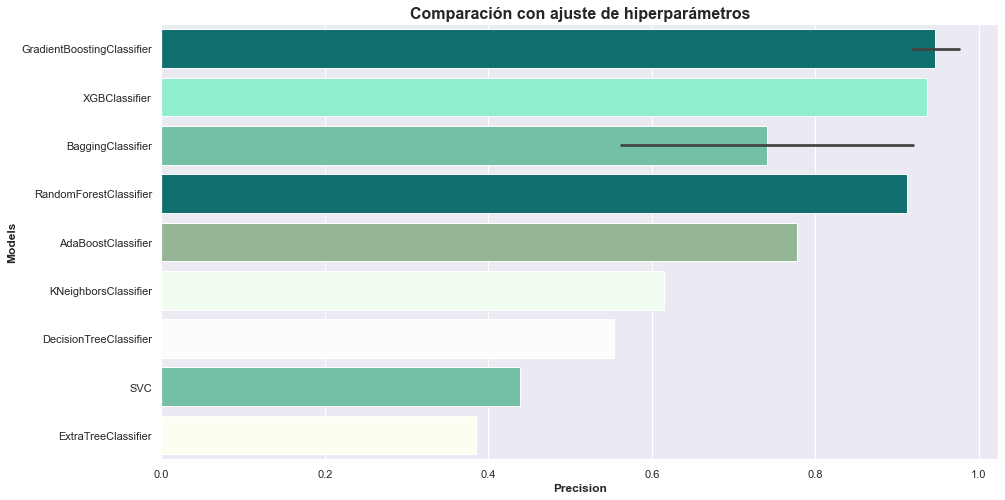

In [230]:
clf_models_comparation(csv_metrics,title="Comparación con ajuste de hiperparámetros")

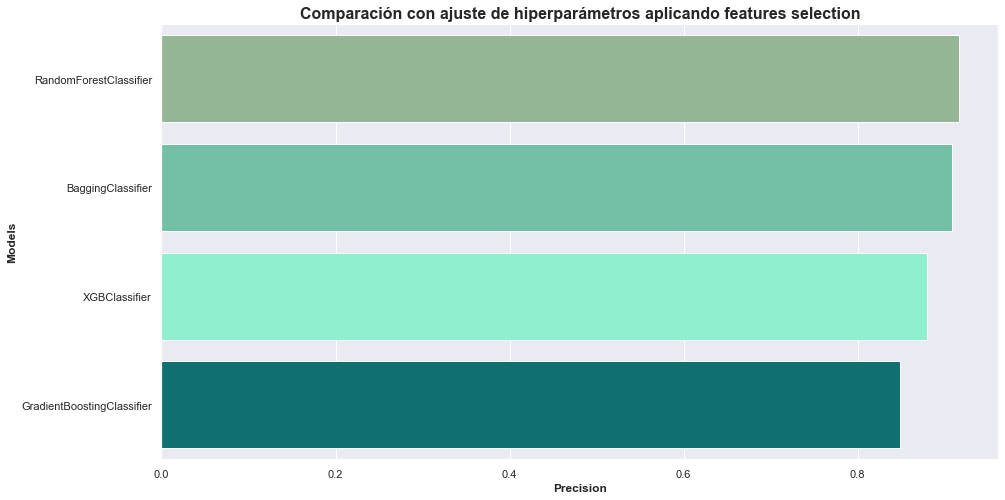

In [235]:
clf_models_comparation(csv_fs_metrics, title = "Comparación con ajuste de hiperparámetros aplicando features selection", del_last = False)

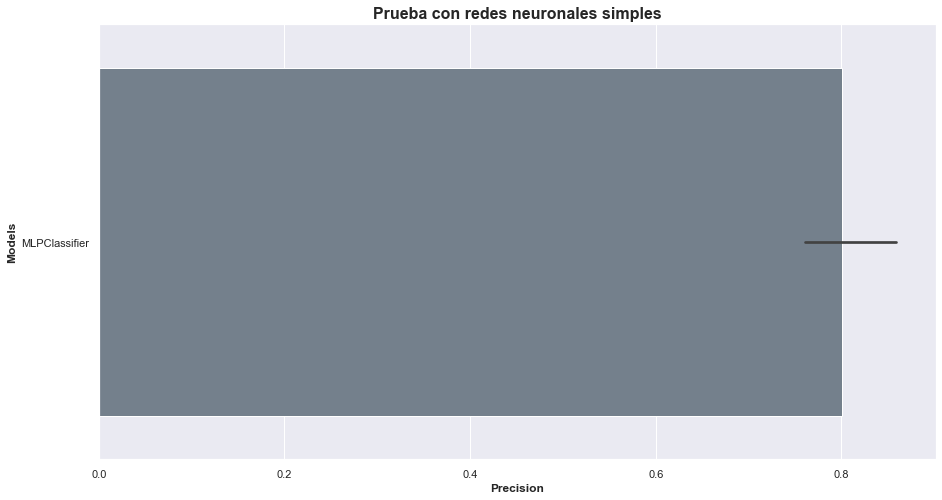

In [238]:
models_comparation(csv_DL_metrics, title = "Prueba con redes neuronales simples", del_last = False, selected_colors=['slategray'])

In [260]:
csv_all_models=csv_metrics.append(csv_fs_metrics)
csv_all_models=csv_all_models.append(csv_DL_metrics)
csv_all_models.reset_index(drop=True,inplace=True)
csv_all_models.sort_values(by='Precision',ascending=False)

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
0,GradientBoostingClassifier,"{'loss': ['log_loss'], 'n_estimators': [100, 2...","{'learning_rate': 0.01, 'loss': 'log_loss', 'm...",0.920000,0.975610,0.239521,0.384615,0.619412,0.238095,model/GradientBoostingClassifier_1.pkl
1,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.973750,0.937063,0.802395,0.864516,0.898057,0.761364,model/XGBClassifier.pkl
2,BaggingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_s...","{'max_samples': 0.5, 'n_estimators': 100}",0.967500,0.919708,0.754491,0.828947,0.873407,0.707865,model/BaggingClassifier_1.pkl
3,GradientBoostingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_d...","{'criterion': 'mse', 'loss': 'exponential', 'm...",0.972500,0.918367,0.808383,0.859873,0.900005,0.754190,model/GradientBoostingClassifier.pkl
12,RandomForestClassifier,"{'n_estimators': array([ 10, 25, 41, 56, 7...","{'class_weight': None, 'criterion': 'entropy',...",0.957500,0.915966,0.652695,0.762238,0.822858,0.615819,model/RandomForestClassifier_1.pkl
4,RandomForestClassifier,"{'n_estimators': array([ 10, 25, 41, 56, 7...","{'class_weight': None, 'criterion': 'entropy',...",0.972500,0.912752,0.814371,0.860759,0.902650,0.755556,model/RandomForestClassifier.pkl
13,BaggingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_s...","{'max_samples': 0.5, 'n_estimators': 100}",0.956875,0.908333,0.652695,0.759582,0.822509,0.612360,model/BaggingClassifier_2.pkl
14,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.955000,0.880000,0.658683,0.753425,0.824108,0.604396,model/XGBClassifier_1.pkl
16,MLPClassifier,"{'activation': ['relu', 'logistic'], 'early_st...","{'activation': 'relu', 'early_stopping': True,...",0.936875,0.858696,0.473054,0.610039,0.731991,0.438889,model/MLPClassifier.pkl
15,GradientBoostingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_d...","{'criterion': 'mse', 'loss': 'log_loss', 'max_...",0.953125,0.848485,0.670659,0.749164,0.828351,0.598930,model/GradientBoostingClassifier_2.pkl


In [261]:
csv_all_models.loc[csv_all_models['Precision']>0.9,:]

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
0,GradientBoostingClassifier,"{'loss': ['log_loss'], 'n_estimators': [100, 2...","{'learning_rate': 0.01, 'loss': 'log_loss', 'm...",0.920000,0.975610,0.239521,0.384615,0.619412,0.238095,model/GradientBoostingClassifier_1.pkl
1,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.973750,0.937063,0.802395,0.864516,0.898057,0.761364,model/XGBClassifier.pkl
2,BaggingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_s...","{'max_samples': 0.5, 'n_estimators': 100}",0.967500,0.919708,0.754491,0.828947,0.873407,0.707865,model/BaggingClassifier_1.pkl
3,GradientBoostingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_d...","{'criterion': 'mse', 'loss': 'exponential', 'm...",0.972500,0.918367,0.808383,0.859873,0.900005,0.754190,model/GradientBoostingClassifier.pkl
4,RandomForestClassifier,"{'n_estimators': array([ 10, 25, 41, 56, 7...","{'class_weight': None, 'criterion': 'entropy',...",0.972500,0.912752,0.814371,0.860759,0.902650,0.755556,model/RandomForestClassifier.pkl
12,RandomForestClassifier,"{'n_estimators': array([ 10, 25, 41, 56, 7...","{'class_weight': None, 'criterion': 'entropy',...",0.957500,0.915966,0.652695,0.762238,0.822858,0.615819,model/RandomForestClassifier_1.pkl
13,BaggingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_s...","{'max_samples': 0.5, 'n_estimators': 100}",0.956875,0.908333,0.652695,0.759582,0.822509,0.612360,model/BaggingClassifier_2.pkl


In [253]:
csv_best_models=csv_metrics[:2].append(csv_fs_metrics[:2])
csv_best_models=csv_best_models.append(csv_DL_metrics[:1])
csv_best_models.reset_index(drop=True,inplace=True)
csv_best_models

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
0,GradientBoostingClassifier,"{'loss': ['log_loss'], 'n_estimators': [100, 2...","{'learning_rate': 0.01, 'loss': 'log_loss', 'm...",0.920000,0.975610,0.239521,0.384615,0.619412,0.238095,model/GradientBoostingClassifier_1.pkl
1,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.973750,0.937063,0.802395,0.864516,0.898057,0.761364,model/XGBClassifier.pkl
2,RandomForestClassifier,"{'n_estimators': array([ 10, 25, 41, 56, 7...","{'class_weight': None, 'criterion': 'entropy',...",0.957500,0.915966,0.652695,0.762238,0.822858,0.615819,model/RandomForestClassifier_1.pkl
3,BaggingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_s...","{'max_samples': 0.5, 'n_estimators': 100}",0.956875,0.908333,0.652695,0.759582,0.822509,0.612360,model/BaggingClassifier_2.pkl
4,MLPClassifier,"{'activation': ['relu', 'logistic'], 'early_st...","{'activation': 'relu', 'early_stopping': True,...",0.936875,0.858696,0.473054,0.610039,0.731991,0.438889,model/MLPClassifier.pkl


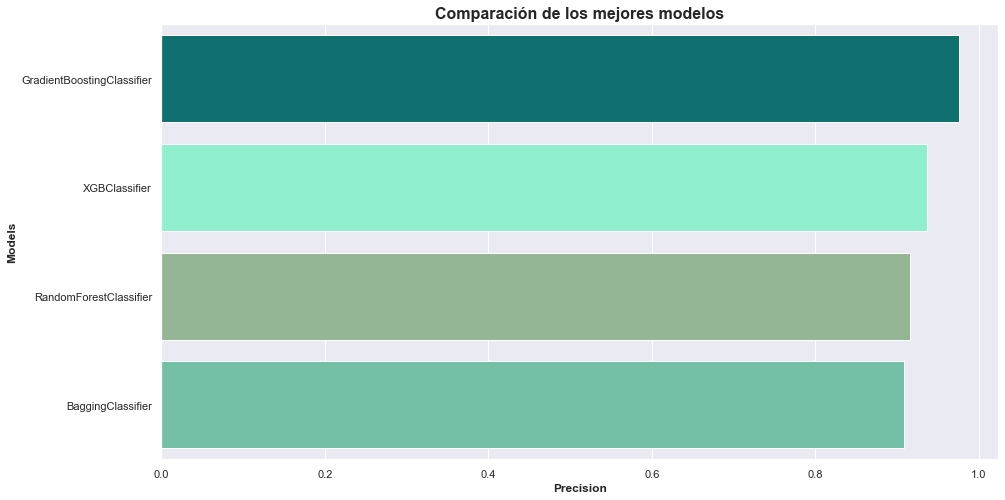

In [256]:
csv_best_models=csv_metrics[:2].append(csv_fs_metrics[:2])
csv_best_models.reset_index(drop=True,inplace=True)
clf_models_comparation(csv_best_models,title="Comparación de los mejores modelos",del_last=False)

**Añadiendo el tiempo de operación a la comparativa entre modelos:**

In [168]:
preroot=os.getcwd()
df=pd.read_csv(preroot+'/data/raw/waterQuality.csv')
df.ammonia=[float(i) if (i!='#NUM!') else np.nan for i in df.ammonia]
df.is_safe=[int(i) if (i!='#NUM!') else np.nan for i in df.is_safe]
df.dropna(inplace=True)

In [299]:
csv_metrics=add_duration(df,'is_safe',csv_metrics)
csv_metrics

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path,duration [s]
0,GradientBoostingClassifier,"{'loss': ['log_loss'], 'n_estimators': [100, 2...","{'learning_rate': 0.01, 'loss': 'log_loss', 'm...",0.920000,0.975610,0.239521,0.384615,0.619412,0.238095,model/GradientBoostingClassifier_1.pkl,4.022271
1,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.973750,0.937063,0.802395,0.864516,0.898057,0.761364,model/XGBClassifier.pkl,2.311891
2,BaggingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_s...","{'max_samples': 0.5, 'n_estimators': 100}",0.967500,0.919708,0.754491,0.828947,0.873407,0.707865,model/BaggingClassifier_1.pkl,8.605268
3,GradientBoostingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_d...","{'criterion': 'mse', 'loss': 'exponential', 'm...",0.972500,0.918367,0.808383,0.859873,0.900005,0.754190,model/GradientBoostingClassifier.pkl,18.537138
4,RandomForestClassifier,"{'n_estimators': array([ 10, 25, 41, 56, 7...","{'class_weight': None, 'criterion': 'entropy',...",0.972500,0.912752,0.814371,0.860759,0.902650,0.755556,model/RandomForestClassifier.pkl,13.949472
5,AdaBoostClassifier,"{'n_estimators': [10, 20, 30, 50, 100]}",{'n_estimators': 100},0.939375,0.777778,0.586826,0.668942,0.783643,0.502564,model/AdaBoostClassifier.pkl,3.957400
6,KNeighborsClassifier,"{'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'wei...","{'algorithm': 'ball_tree', 'leaf_size': 20, 'n...",0.899375,0.615385,0.095808,0.165803,0.544415,0.090395,model/KNeighborsClassifier.pkl,2.923183
7,BaggingClassifier,{'base_estimator': [DecisionTreeClassifier(cla...,{'base_estimator': DecisionTreeClassifier(clas...,0.916250,0.562738,0.886228,0.688372,0.902988,0.524823,model/BaggingClassifier.pkl,0.642462
8,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'gin...",0.912500,0.554217,0.826347,0.663462,0.874444,0.496403,model/DecisionTreeClassifier.pkl,0.080644
9,SVC,"[{'C': [1, 10, 100, 1000], 'kernel': ['linear'...","{'C': 1000, 'class_weight': 'balanced', 'kerne...",0.870625,0.438650,0.856287,0.580122,0.864292,0.408571,model/SVC.pkl,21.232019


In [300]:
csv_fs_metrics=add_duration(df,'is_safe',csv_fs_metrics)
csv_fs_metrics

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path,duration [s]
0,RandomForestClassifier,"{'n_estimators': array([ 10, 25, 41, 56, 7...","{'class_weight': None, 'criterion': 'entropy',...",0.957500,0.915966,0.652695,0.762238,0.822858,0.615819,model/RandomForestClassifier_1.pkl,17.326283
1,BaggingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_s...","{'max_samples': 0.5, 'n_estimators': 100}",0.956875,0.908333,0.652695,0.759582,0.822509,0.612360,model/BaggingClassifier_2.pkl,8.703746
2,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.955000,0.880000,0.658683,0.753425,0.824108,0.604396,model/XGBClassifier_1.pkl,2.461834
3,GradientBoostingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_d...","{'criterion': 'mse', 'loss': 'log_loss', 'max_...",0.953125,0.848485,0.670659,0.749164,0.828351,0.598930,model/GradientBoostingClassifier_2.pkl,18.638770


In [303]:
csv_DL_metrics=add_duration(df,'is_safe',csv_DL_metrics)
csv_DL_metrics

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path,duration [s]
0,MLPClassifier,"{'activation': ['relu', 'logistic'], 'early_st...","{'activation': 'relu', 'early_stopping': True,...",0.936875,0.858696,0.473054,0.610039,0.731991,0.438889,model/MLPClassifier.pkl,5.408192
1,MLPClassifier,"{'activation': ['relu', 'logistic'], 'early_st...","{'activation': 'relu', 'early_stopping': True,...",0.940000,0.784000,0.586826,0.671233,0.783992,0.505155,model/MLPClassifier_2.pkl,3.815114
2,MLPClassifier,"{'activation': ['relu'], 'early_stopping': [Tr...","{'activation': 'relu', 'early_stopping': True,...",0.933750,0.760684,0.532934,0.626761,0.756697,0.456410,model/MLPClassifier_1.pkl,10.033892


El ***modelo considerado óptimo*** según las métricas obtenidas es el siguiente y es el que se utilizará en la automatización/productivización.

In [ ]:
saved_metrics = pd.read_csv('model/model_metrics/metrics.csv',sep=';').sort_values(by='Precision',ascending=False)
ruta_model = os.path.join(os.getcwd(),list(saved_metrics['model_path'])[0])

modelo_seleccionado = pickle.load(open(ruta_model,'rb'))

In [ ]:
modelo_seleccionado

GradientBoostingClassifier(learning_rate=0.01, loss='deviance', max_depth=8,
                           max_features=0.3, min_samples_leaf=250)

##  **3.1. Creación de un pipeline para el flujo automatizado**<a id='31'></a>

In [ ]:
pipeline = make_pipeline(
    ("scaler", StandardScaler()),
    ("balance", SMOTE()),
    ("selectkbest", StratifiedKFold()),
    ("modelo", modelo_seleccionado))

pipeline.fit(X_train,y_train)


In [ ]:
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("balance", SMOTEENN()),
    ("selectkbest", StratifiedKFold()),
    ("modelo", modelo_seleccionado)])

pipeline.fit(X_train,y_train)


In [ ]:
y_pred = pipeline.predict(X_test)